# Preset : Install PyCaret
### Have to load PyCaret in the beginning when process the Notebook file under Google Colab environment.

In [ ]:
!pip install pycaret[full] # we have to use [full] to have full list of algorithms to have XGBoost, Lightgbm...
!pip install --upgrade pycaret
from pycaret.utils import version
version()

# For Google Colab only
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 266 kB 14.9 MB/s 
     |████████████████████████████████| 271 kB 75.8 MB/s 
     |████████████████████████████████| 14.6 MB 44.3 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 261 kB 71.7 MB/s 
     |████████████████████████████████| 1.3 MB 64.7 MB/s 
     |████████████████████████████████| 167 kB 82.2 MB/s 
     |████████████████████████████████| 1.7 MB 44.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 73.6 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 6.8 MB 49.3 MB/s 
     |████████████████████████████████| 2.0 MB 64.5 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 166.7 MB 8.2 kB/s 
     |███████████████

# Prediction of Honda Civic Sales in US

## Problem Statement

What effect Honda Civic sales amount? As a royal Honda Civic users, I am curious about that. I want to make a sales prediction model this bestselling compact cars based on previous sales data provides by www.goodcarbadcar.net. These details concern the time series sales data, SP500 index and gas price history. 

|Variable| Description|
|: ------------- |:-------------|
|Total|Total Sales Amount 2005-2021|
|CVC|Honda Civic Sales Amount 2005-2021|
|Gas|Average Gas Price History 2005-2021|
|SP500|SP500 Index History 2005-2021|
|Other Car Model|Individaul Sales of Car Model 2019 Jan-2021 Jun|



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
What effects Honda Civic Sales?

1. Sales of potential competitors?(Toyota Corolla, Tesla Model3...) 
2. Stock Market Performance
3. Depends on customer preference
4. Gas Price

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [31]:
# Load required modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
# Load excel files we collect
df_cvc = pd.read_excel('CVC_Total.xlsx',sheet_name=0, index_col=0)
df_t = pd.read_excel('CVC_Total.xlsx',sheet_name=1, index_col=0) 
df_sp = pd.read_excel('SP500.xls')
df_gas = pd.read_excel('US_Gas_Price.xlsx')

In [32]:
# See the first 5 rows of Civic Sales
df_cvc.head()

Jan    Feb    Mar    Apr    May  ...    Aug    Sep    Oct    Nov    Dec
Year                                     ...                                   
2005  15874  17967  25414  31557  24765  ...  34762  30165  23911  23695  26971
2006  24788  24722  28969  31259  29006  ...  31549  26331  21343  20143  23609
2007  18378  20041  29721  29155  39993  ...  28551  24752  23809  25141  27190
2008  20993  23799  32740  30000  53299  ...  30052  21577  18582  17690  17302
2009  14198  15687  20645  26252  20723  ...  43294  16093  15868  13652  22319

[5 rows x 12 columns]

In [33]:
# See the first 5 rows of Total Car Sales
df_t.head()

Jan      Feb      Mar      Apr  ...      Sep      Oct      Nov      Dec
Month                                      ...                                    
2005   1052224  1244753  1564938  1493837  ...  1321156  1139217  1160447  1475649
2006   1136538  1253271  1519952  1439311  ...  1342543  1205973  1188344  1419758
2007   1079891  1244375  1528582  1326837  ...  1305275  1221485  1170035  1377542
2008   1036540  1162277  1339158  1237336  ...   959127   829396   737978   884306
2009    650608   681676   847002   822746  ...   740394   832953   741826  1013629

[5 rows x 12 columns]

In [34]:
# Check the SP500 history
df_sp

Price
0    1181.41
1    1199.63
2    1194.90
3    1164.43
4    1178.28
..       ...
198  4358.13
199  4450.37
200  4357.04
201     0.00
202     0.00

[203 rows x 1 columns]

In [35]:
# Check the SP500 history
df_gas

Price
0    1.875
1    1.953
2    2.120
3    2.285
4    2.205
..     ...
199  3.255
200  3.272
201  0.000
202  0.000
203  0.000

[204 rows x 1 columns]

In [36]:
# Modify the shape of the data to the desired format: Month -> Sales 
list_cvc = []
list_t = []
for i in range(df_cvc.shape[0]):
  for j in range(df_cvc.shape[1]):
    list_cvc.append(df_cvc.iloc[i,j])
    list_t.append(df_t.iloc[i,j])
print(list_cvc)
print(list_t) 

[15874, 17967, 25414, 31557, 24765, 25326, 28008, 34762, 30165, 23911, 23695, 26971, 24788, 24722, 28969, 31259, 29006, 26312, 28607, 31549, 26331, 21343, 20143, 23609, 18378, 20041, 29721, 29155, 39993, 36512, 27852, 28551, 24752, 23809, 25141, 27190, 20993, 23799, 32740, 30000, 53299, 39967, 29125, 30052, 21577, 18582, 17690, 17302, 14198, 15687, 20645, 26252, 20723, 20954, 30037, 43294, 16093, 15868, 13652, 22319, 14693, 16471, 22463, 25042, 28458, 26474, 23231, 22803, 18637, 17121, 16562, 28263, 14634, 19121, 31213, 26777, 18341, 17485, 14006, 12083, 13724, 16173, 17133, 20545, 21883, 54174, 28199, 24423, 33490, 27500, 25004, 24897, 21546, 20687, 30075, 33118, 21881, 22713, 27665, 26453, 30268, 29724, 32416, 39459, 22983, 27328, 26291, 29000, 21824, 21575, 27697, 27611, 36089, 32301, 30038, 34032, 22263, 24254, 23060, 25337, 18699, 21038, 26985, 28380, 34472, 28727, 31139, 32031, 28278, 27789, 25050, 32796, 26741, 27707, 32855, 35331, 35396, 31810, 32952, 32807, 28184, 26359, 25303

In [37]:
# Creat a DataFrame and put all the data into it
df = pd.DataFrame()
df['Date'] = pd.date_range(start='2005-01', periods=204, freq='M')
df['Series'] = np.arange(1,len(df)+1) # This is for future use to deal with time series
df['Total'] = list_t
df['SP500'] = df_sp.Price
df['Gas'] = df_gas.Price
df['CVC_Sales'] = list_cvc

In [38]:
# The merged DateFrame
df

Date  Series    Total    SP500    Gas  CVC_Sales
0   2005-01-31       1  1052224  1181.41  1.875      15874
1   2005-02-28       2  1244753  1199.63  1.953      17967
2   2005-03-31       3  1564938  1194.90  2.120      25414
3   2005-04-30       4  1493837  1164.43  2.285      31557
4   2005-05-31       5  1488171  1178.28  2.205      24765
..         ...     ...      ...      ...    ...        ...
199 2021-08-31     200  1037933  4450.37  3.255      19654
200 2021-09-30     201   822619  4357.04  3.272      15647
201 2021-10-31     202        0     0.00  0.000          0
202 2021-11-30     203        0     0.00  0.000          0
203 2021-12-31     204        0      NaN  0.000          0

[204 rows x 6 columns]

In [39]:
# Remove the last three months with blank cell
df = df.drop([201,202,203])

In [40]:
# Check if there is missing value
df.isna().sum()

Date         0
Series       0
Total        0
SP500        0
Gas          0
CVC_Sales    0
dtype: int64

In [41]:
# Check the basic info, and also make sure "Date" column is in "datetime" type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       201 non-null    datetime64[ns]
 1   Series     201 non-null    int64         
 2   Total      201 non-null    int64         
 3   SP500      201 non-null    float64       
 4   Gas        201 non-null    float64       
 5   CVC_Sales  201 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 11.0 KB


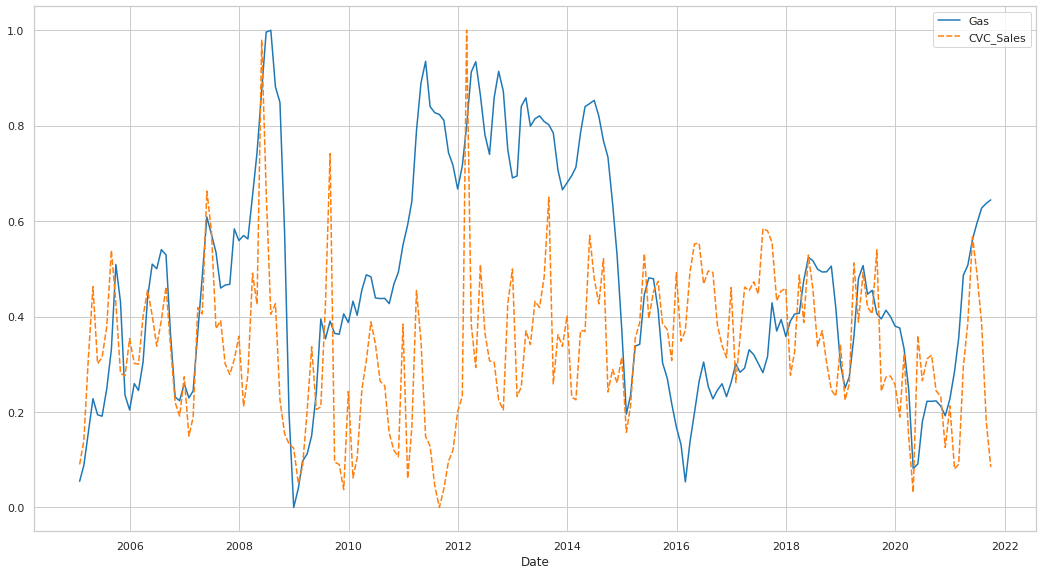

In [42]:
# Make a plot to see the correlation between gas and Civic sales, during 2008-2009, gas price has strong correlation to Civic sales 
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler

values = df[['Gas',	'CVC_Sales']]
dates = df['Date']
scaler = MinMaxScaler()
values = scaler.fit_transform(values)
data = pd.DataFrame(values, dates, columns=['Gas', 'CVC_Sales'])
sns.lineplot(data=data, palette="tab10", linewidth=1.5)

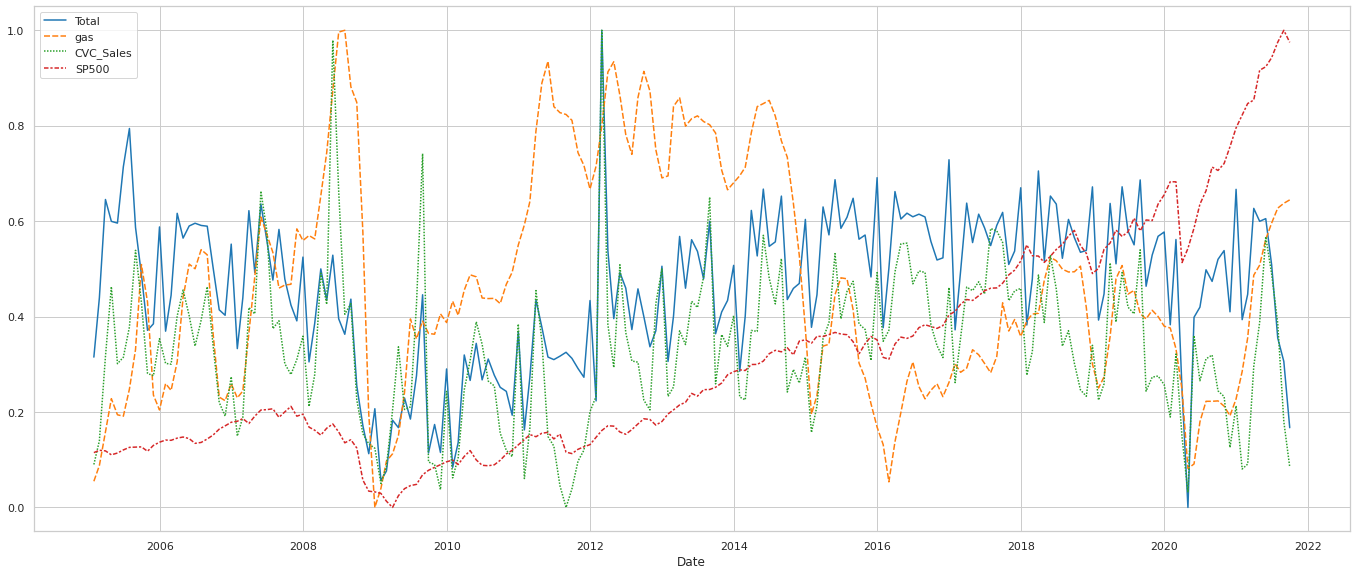

In [43]:
# Make a plot to see the correlation between gas price, SP500, total cars sales and Civic sales
# 2011 Civic sales fell to the valley due to the complaint about its "boring" appearance, after redesigned sales came up to another peek
# The trend of SP500 has correlation to total car sales, the exception is in 2021, since the most of companies of SP500 are growing during the pandemic yet car sales does not follow the trend
# another reason was because the shortage of the car chips, the supply would not catch up the demand, yet Honda Civic sales is still at the top ranking   
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(rc={'figure.figsize':(21,9)})
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler

values = df[['Total', "Gas",	'CVC_Sales','SP500']]
date= df.Date
scaler = MinMaxScaler()
values = scaler.fit_transform(values)
data = pd.DataFrame(values, date, columns=['Total',"gas", 'CVC_Sales','SP500'])
sns.lineplot(data=data, palette="tab10", linewidth=1.5)

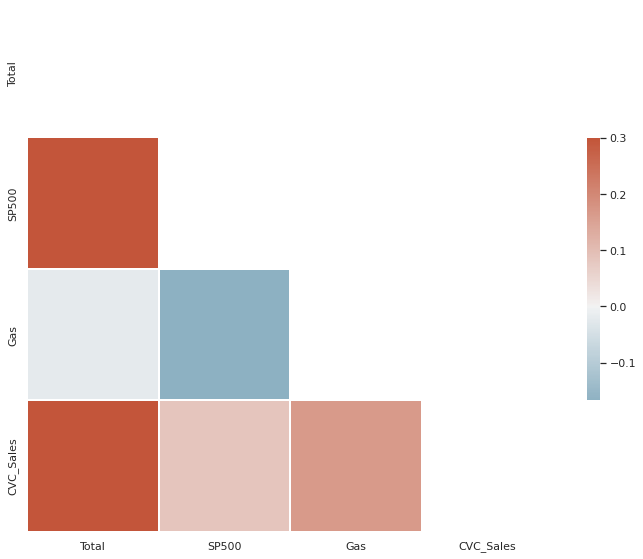

In [44]:
# A plot of the correlation
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
cor_data = df.drop(columns=['Date','Series']) 
d = cor_data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## PyCaret: recommended algorithms

In [45]:
# split data into train-test set
df_drop_Data = df.drop(columns='Date')
train = df_drop_Data[df_drop_Data.index < 196]
test = df_drop_Data[df_drop_Data.index >= 196]
# check shape
train.shape, test.shape

((196, 5), (5, 5))

In [46]:
# import the regression module
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [53]:
# initialize setup
s = setup(data = train, test_data = test, target = 'CVC_Sales', fold_strategy = 'timeseries', fold = 3,transform_target = True, session_id = 123, normalize= True, normalize_method='minmax')

Description             Value
0                               session_id               123
1                                   Target         CVC_Sales
2                            Original Data          (196, 5)
3                           Missing Values             False
4                         Numeric Features                 4
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set          (196, 3)
10                    Transformed Test Set            (5, 3)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator   TimeSeriesSplit
14                             Fold Number                 3
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              a1ba
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            minmax
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target              True
57                 Transform Target Method           box-cox

In [54]:
best = compare_models(sort = 'MSE')

Model        MAE           MSE       RMSE  \
omp           Orthogonal Matching Pursuit  3168.7814  1.790740e+07  4124.7057   
lightgbm  Light Gradient Boosting Machine  4154.2065  2.868796e+07  5231.1339   
ridge                    Ridge Regression  4077.8222  2.890950e+07  5100.1347   
br                         Bayesian Ridge  4227.4656  2.965218e+07  5255.9608   
gbr           Gradient Boosting Regressor  4198.2867  3.075245e+07  5363.8784   
rf                Random Forest Regressor  4448.2100  3.244791e+07  5567.6438   
ada                    AdaBoost Regressor  4392.5143  3.329441e+07  5459.6658   
catboost               CatBoost Regressor  4401.9265  3.334704e+07  5549.1502   
huber                     Huber Regressor  4599.6811  3.349933e+07  5620.4162   
lar                Least Angle Regression  4668.9980  3.442560e+07  5680.5609   
lr                      Linear Regression  4668.9996  3.442563e+07  5680.5639   
knn                 K Neighbors Regressor  4605.4976  3.550511e+07  5763.5974   
et                  Extra Trees Regressor  4664.5273  4.061116e+07  6094.1476   
llar         Lasso Least Angle Regression  5603.0617  4.854707e+07  6888.2002   
lasso                    Lasso Regression  5603.0685  4.854718e+07  6888.2076   
en                            Elastic Net  5603.0685  4.854718e+07  6888.2076   
xgboost         Extreme Gradient Boosting  5205.8274  5.022793e+07  6874.0982   
par          Passive Aggressive Regressor  6721.5983  6.252190e+07  7861.2245   
dt                Decision Tree Regressor  5626.9660  6.735555e+07  7722.8979   

              R2   RMSLE    MAPE  TT (Sec)  
omp       0.5049  0.1655  0.1351    0.0133  
lightgbm  0.1784  0.2061  0.1762    0.1133  
ridge     0.2791  0.2072  0.1839    0.0133  
br        0.1509  0.2117  0.1794    0.0133  
gbr       0.1667  0.2022  0.1751    0.0267  
rf        0.0437  0.2099  0.1851    0.2067  
ada       0.1703  0.2078  0.1885    0.0400  
catboost  0.1005  0.2116  0.1863    0.3300  
huber    -0.1211  0.2297  0.1903    0.0133  
lar      -0.0971  0.2302  0.1942    0.0167  
lr       -0.0971  0.2302  0.1942    0.6133  
knn       0.0480  0.2327  0.2046    0.0467  
et       -0.1362  0.2204  0.1952    0.1700  
llar     -0.5040  0.2729  0.2350    0.0133  
lasso    -0.5040  0.2729  0.2350    0.3800  
en       -0.5040  0.2729  0.2350    0.0133  
xgboost  -0.6853  0.2390  0.2092    3.9733  
par      -0.9738  0.3053  0.2811    0.0133  
dt       -1.6678  0.2571  0.2230    0.0133

In [55]:
prediction_holdout = predict_model(best);

Model        MAE           MSE  ...      R2   RMSLE    MAPE
0  Orthogonal Matching Pursuit  4164.7367  2.119348e+07  ...  0.6416  0.1674  0.1493

[1 rows x 7 columns]

In [56]:
rf = create_model('rf')
#lgbm = creat_model('lightgbm')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     5783.1257  5.161033e+07  7184.0327  0.1276  0.2856  0.2666
1     4241.1694  2.727364e+07  5222.4172 -0.4105  0.1727  0.1494
2     3320.3349  1.845975e+07  4296.4816  0.4141  0.1715  0.1392
Mean  4448.2100  3.244791e+07  5567.6438  0.0437  0.2099  0.1851
SD    1016.0328  1.401951e+07  1203.8477  0.3418  0.0535  0.0578

In [57]:
# train a bagging classifier on dt
bagged_rf = ensemble_model(rf, method = 'Bagging')
# train a adaboost classifier on dt with 100 estimators
boosted_rf = ensemble_model(rf, method = 'Boosting', n_estimators = 100)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     6560.4179  6.974829e+07  8351.5440 -0.1791  0.3170  0.3020
1     3730.2858  2.113111e+07  4596.8592 -0.0928  0.1510  0.1331
2     3347.7674  1.809643e+07  4253.9896  0.4256  0.1703  0.1405
Mean  4546.1571  3.632528e+07  5734.1309  0.0512  0.2127  0.1919
SD    1432.8329  2.366609e+07  1856.0762  0.2670  0.0741  0.0779

In [58]:
xgb = create_model('xgboost')
#lgbm = creat_model('lightgbm')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     6326.6812  6.732236e+07  8205.0206 -0.1381  0.3059  0.2813
1     5892.6932  6.366150e+07  7978.8157 -2.2924  0.2319  0.2017
2     3398.1077  1.969991e+07  4438.4584  0.3747  0.1792  0.1447
Mean  5205.8274  5.022793e+07  6874.0982 -0.6853  0.2390  0.2092
SD    1290.4713  2.163824e+07  1724.7315  1.1555  0.0520  0.0560

In [59]:
# train a bagging classifier on dt
bagged_xgb = ensemble_model(xgb, method = 'Bagging')
# train a adaboost classifier on dt with 100 estimators
boosted_xgb = ensemble_model(xgb, method = 'Boosting', n_estimators = 100)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     6200.6476  6.595162e+07  8121.0602 -0.1149  0.3017  0.2810
1     3506.2549  1.788110e+07  4228.6048  0.0752  0.1412  0.1236
2     3189.3128  1.713673e+07  4139.6531  0.4561  0.1661  0.1342
Mean  4298.7384  3.365648e+07  5496.4394  0.1388  0.2030  0.1796
SD    1351.0630  2.283813e+07  1856.2424  0.2374  0.0705  0.0719

In [60]:
prediction_holdout = predict_model(boosted_xgb);

Model        MAE           MSE  ...      R2   RMSLE    MAPE
0  Extreme Gradient Boosting  5169.4102  3.619379e+07  ...  0.3879  0.2249  0.1799

[1 rows x 7 columns]

In [61]:
# tune hyperparameters with custom_grid to RandomForest
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          }
tuned_dt_custom = tune_model(rf, custom_grid = params)
# tune multiple models dynamically
#top3 = compare_models(n_select = 3)
#tuned_top3 = [tune_model(i) for i in top3]

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     4857.8127  3.996879e+07  6322.0873  0.3243  0.2582  0.2270
1     3045.0159  1.431415e+07  3783.4052  0.2597  0.1330  0.1080
2     4043.5133  2.318430e+07  4815.0076  0.2641  0.1986  0.1762
Mean  3982.1140  2.582241e+07  4973.5000  0.2827  0.1966  0.1704
SD     741.3436  1.063829e+07  1042.4544  0.0295  0.0511  0.0488

In [62]:
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt_custom = tune_model(xgb, custom_grid = params)
# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     6027.4033  5.231137e+07  7232.6601  0.1157  0.3003  0.2869
1     3007.8185  1.523267e+07  3902.9049  0.2122  0.1350  0.1071
2     3458.3951  1.922256e+07  4384.3544  0.3898  0.1729  0.1434
Mean  4164.5390  2.892220e+07  5173.3065  0.2392  0.2027  0.1791
SD    1330.0257  1.661866e+07  1469.3879  0.1135  0.0707  0.0776

### Summary: Traditional linear regression algorithms would not perform well, we will train XGBOOST since it has good reputation on sales prediction.

# Add more sales data of other passenger cars

In [64]:
# Decided to add more data: add all sales amount of each car model
df1 = pd.read_excel('US_Sales.xlsx',sheet_name=0)
df2 = pd.read_excel('US_Sales.xlsx',sheet_name=1)
df3 = pd.read_excel('US_Sales.xlsx',sheet_name=2)

In [65]:
# Add header to the DataFrames
df1.columns = ['Model', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12']
df2.columns = ['Model', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12']
df3.columns = ['Model', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12']

In [66]:
# Make sure they have the same shape for future joining
df1.shape,df2.shape,df3.shape

((296, 13), (304, 13), (302, 13))

In [67]:
# Use outer join to merge DataFrames together
df19_20 = pd.merge(df3, df2,how='outer')
df19_21 = pd.merge(df19_20, df1, how='outer')
df19_21.head()

Model 2019-01 2019-02 2019-03  ... 2021-09 2021-10 2021-11 2021-12
0  Acura ILX     805    1047    1289  ...       -       -       -       -
1  Acura MDX    2968    3833    3982  ...       -       -       -       -
2  Acura NSX      31      22      26  ...       -       -       -       -
3  Acura RDX    4172    4965    5835  ...       -       -       -       -
4  Acura RLX     119     127     135  ...       -       -       -       -

[5 rows x 37 columns]

In [68]:
# Transpose them to be the desired format
df_t = df19_21.T
df_t.head()

0          1    ...      322              323
Model    Acura ILX  Acura MDX  ...  Mazda 5  Volkswagen Taos
2019-01        805       2968  ...      NaN              NaN
2019-02       1047       3833  ...      NaN              NaN
2019-03       1289       3982  ...      NaN              NaN
2019-04       1152       3339  ...      NaN              NaN

[5 rows x 324 columns]

In [69]:
# Turn "-" to numpy NaN for replacing the missing value
df_ = df_t.replace('-', np.nan)
df_.head()

0          1    ...      322              323
Model    Acura ILX  Acura MDX  ...  Mazda 5  Volkswagen Taos
2019-01        805       2968  ...      NaN              NaN
2019-02       1047       3833  ...      NaN              NaN
2019-03       1289       3982  ...      NaN              NaN
2019-04       1152       3339  ...      NaN              NaN

[5 rows x 324 columns]

In [70]:
# Turn all the missing values to 0 (however it is not neccesary when using XGBOOST)
df_model= df_.fillna(0)
df_model.tail()

0     1   2     3   4     5   6    ...   317   318 319 320 321 322 323
2021-08  1018  4632  31  5842   1  2768   0  ...  1525  1252   0   0   0   0   0
2021-09     0     0   0     0   0     0   0  ...     0     0   0   0   0   0   0
2021-10     0     0   0     0   0     0   0  ...     0     0   0   0   0   0   0
2021-11     0     0   0     0   0     0   0  ...     0     0   0   0   0   0   0
2021-12     0     0   0     0   0     0   0  ...     0     0   0   0   0   0   0

[5 rows x 324 columns]

In [71]:
# Generate index of row
df_model = df_model.reset_index()
df_model.head()

index          0          1  ...           321      322              323
0    Model  Acura ILX  Acura MDX  ...  Kia Carnival  Mazda 5  Volkswagen Taos
1  2019-01        805       2968  ...             0        0                0
2  2019-02       1047       3833  ...             0        0                0
3  2019-03       1289       3982  ...             0        0                0
4  2019-04       1152       3339  ...             0        0                0

[5 rows x 325 columns]

In [72]:
# Use first row for the column name
new_header = df_model.iloc[0] #grab the first row for the header
df_model = df_model[1:] #take the data less the header row
df_model.columns = new_header #set the header row as the df header
df_model.tail(7)

0     Model Acura ILX Acura MDX  ... Kia Carnival Mazda 5 Volkswagen Taos
30  2021-06      2093      5077  ...            0       0            1668
31  2021-07      1957      4290  ...            0       0               0
32  2021-08      1018      4632  ...            0       0               0
33  2021-09         0         0  ...            0       0               0
34  2021-10         0         0  ...            0       0               0
35  2021-11         0         0  ...            0       0               0
36  2021-12         0         0  ...            0       0               0

[7 rows x 325 columns]

In [73]:
# Drop the blank row
df_model.drop([31,32,33,34,35,36], inplace=True)

In [74]:
# Show the first 5 rows
df_model.head()

0    Model Acura ILX Acura MDX  ... Kia Carnival Mazda 5 Volkswagen Taos
1  2019-01       805      2968  ...            0       0               0
2  2019-02      1047      3833  ...            0       0               0
3  2019-03      1289      3982  ...            0       0               0
4  2019-04      1152      3339  ...            0       0               0
5  2019-05      1351      4425  ...            0       0               0

[5 rows x 325 columns]

In [75]:
# Drop the 'Model'(Date) and Civic sales since there is duplicate date in the first DataFrame
df_model = df_model.drop(columns=['Model','Honda Civic'])
df_model.head()
df_model = df_model.reset_index()
df_model = df_model.drop(columns=['index'])
df_model.head()

0 Acura ILX Acura MDX Acura NSX  ... Kia Carnival Mazda 5 Volkswagen Taos
0       805      2968        31  ...            0       0               0
1      1047      3833        22  ...            0       0               0
2      1289      3982        26  ...            0       0               0
3      1152      3339        23  ...            0       0               0
4      1351      4425        30  ...            0       0               0

[5 rows x 323 columns]

In [76]:
# Have to change data type to float for the algorithm
df_model = df_model.astype(float)
df_model.dtypes.head()

0
Acura ILX    float64
Acura MDX    float64
Acura NSX    float64
Acura RDX    float64
Acura RLX    float64
dtype: object

In [77]:
# Since we only have data from 2019-01 to 2021-06, we select data from the first DataFrame according to the time range
df_a = df[168:198].reset_index()
df_a

index       Date  Series    Total    SP500    Gas  CVC_Sales
0     168 2019-01-31     169  1172653  2607.39  2.338      21553
1     169 2019-02-28     170  1257589  2754.86  2.393      22979
2     170 2019-03-31     171  1552126  2803.98  2.594      33653
3     171 2019-04-30     172  1355548  2903.80  2.881      28436
4     172 2019-05-31     173  1606260  2854.71  2.946      32800
5     173 2019-06-30     174  1462664  2890.17  2.804      29751
6     174 2019-07-31     175  1417418  2996.11  2.823      29167
7     175 2019-08-31     176  1628577  2897.50  2.707      34808
8     176 2019-09-30     177  1282712  2982.16  2.681      22337
9     177 2019-10-31     178  1384010  2977.68  2.724      23577
10    178 2019-11-30     179  1445173  3104.90  2.693      23676
11    179 2019-12-31     180  1459164  3176.75  2.645      22913
12    180 2020-01-31     181  1157415  3278.20  2.636      20054
13    181 2020-02-29     182  1434716  3277.31  2.533      25617
14    182 2020-03-31     183   944850  2652.39  2.329      18273
15    183 2020-04-30     184   563122  2761.98  1.938      13410
16    184 2020-05-31     185  1181756  2919.61  1.961      27244
17    185 2020-06-30     186  1214706  3104.66  2.170      23260
18    186 2020-07-31     187  1336267  3207.62  2.272      25188
19    187 2020-08-31     188  1298489  3391.71  2.272      25524
20    188 2020-09-30     189  1370243  3365.52  2.274      22371
21    189 2020-10-31     190  1398735  3418.70  2.248      21865
22    190 2020-11-30     191  1199580  3548.99  2.200      17372
23    191 2020-12-31     192  1597958  3695.31  2.284      21047
24    192 2021-01-31     193  1174053  3793.75  2.420      15475
25    193 2021-02-28     194  1256529  3883.43  2.587      15906
26    194 2021-03-31     195  1536038  3910.51  2.898      24522
27    195 2021-04-30     196  1493938  4141.18  2.948      28414
28    196 2021-05-31     197  1502642  4167.85  3.076      35962
29    197 2021-06-30     198  1352285  4238.49  3.157      32677

In [78]:
# Join 2 DataFrames
df_1 = pd.concat([df_a,df_model], axis=1)

In [79]:
# Show the first 5 rows
df_1.head()

index       Date  Series  ...  Kia Carnival  Mazda 5  Volkswagen Taos
0    168 2019-01-31     169  ...           0.0      0.0              0.0
1    169 2019-02-28     170  ...           0.0      0.0              0.0
2    170 2019-03-31     171  ...           0.0      0.0              0.0
3    171 2019-04-30     172  ...           0.0      0.0              0.0
4    172 2019-05-31     173  ...           0.0      0.0              0.0

[5 rows x 330 columns]

In [80]:
# Drop unwanted columns
df = df_1.drop(columns=['index','Date','Series'])
df.head()

Total    SP500    Gas  ...  Kia Carnival  Mazda 5  Volkswagen Taos
0  1172653  2607.39  2.338  ...           0.0      0.0              0.0
1  1257589  2754.86  2.393  ...           0.0      0.0              0.0
2  1552126  2803.98  2.594  ...           0.0      0.0              0.0
3  1355548  2903.80  2.881  ...           0.0      0.0              0.0
4  1606260  2854.71  2.946  ...           0.0      0.0              0.0

[5 rows x 327 columns]

In [81]:
# Rearrange the columns order and move Civic sales to the very end
col = df.columns.tolist()
col = col[0:3] + col[4:] + col[3:4]
df = df[col]
df.describe()

Total        SP500  ...  Volkswagen Taos     CVC_Sales
count  3.000000e+01    30.000000  ...        30.000000     30.000000
mean   1.334574e+06  3256.907333  ...       165.333333  24661.033333
std    2.152123e+05   471.522417  ...       504.610832   5810.690098
min    5.631220e+05  2607.390000  ...         0.000000  13410.000000
25%    1.225162e+06  2899.075000  ...         0.000000  21631.000000
50%    1.362896e+06  3140.825000  ...         0.000000  23626.500000
75%    1.461789e+06  3516.417500  ...         0.000000  28430.500000
max    1.628577e+06  4238.490000  ...      1688.000000  35962.000000

[8 rows x 327 columns]

In [82]:
# Assign the data to be the index of row
df_1 = df_1.drop(columns=['index','Series','Total'])
df_1 = df_1.set_index('Date')
df_1.head()

SP500    Gas  CVC_Sales  ...  Kia Carnival  Mazda 5  Volkswagen Taos
Date                                   ...                                        
2019-01-31  2607.39  2.338      21553  ...           0.0      0.0              0.0
2019-02-28  2754.86  2.393      22979  ...           0.0      0.0              0.0
2019-03-31  2803.98  2.594      33653  ...           0.0      0.0              0.0
2019-04-30  2903.80  2.881      28436  ...           0.0      0.0              0.0
2019-05-31  2854.71  2.946      32800  ...           0.0      0.0              0.0

[5 rows x 326 columns]

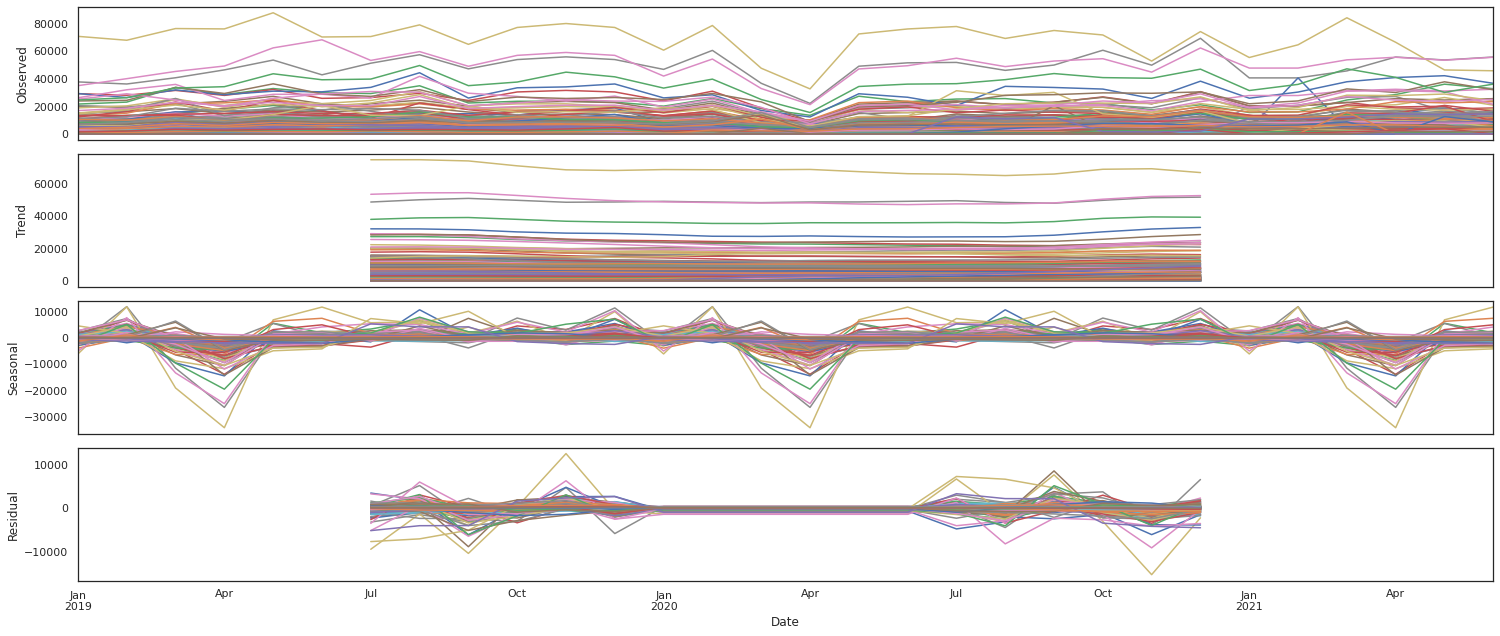

In [83]:
# Check the trend and seasonality of data
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
dtrend_df = seasonal_decompose(df_1, model='additive')
dtrend_df.plot()
pyplot.show()

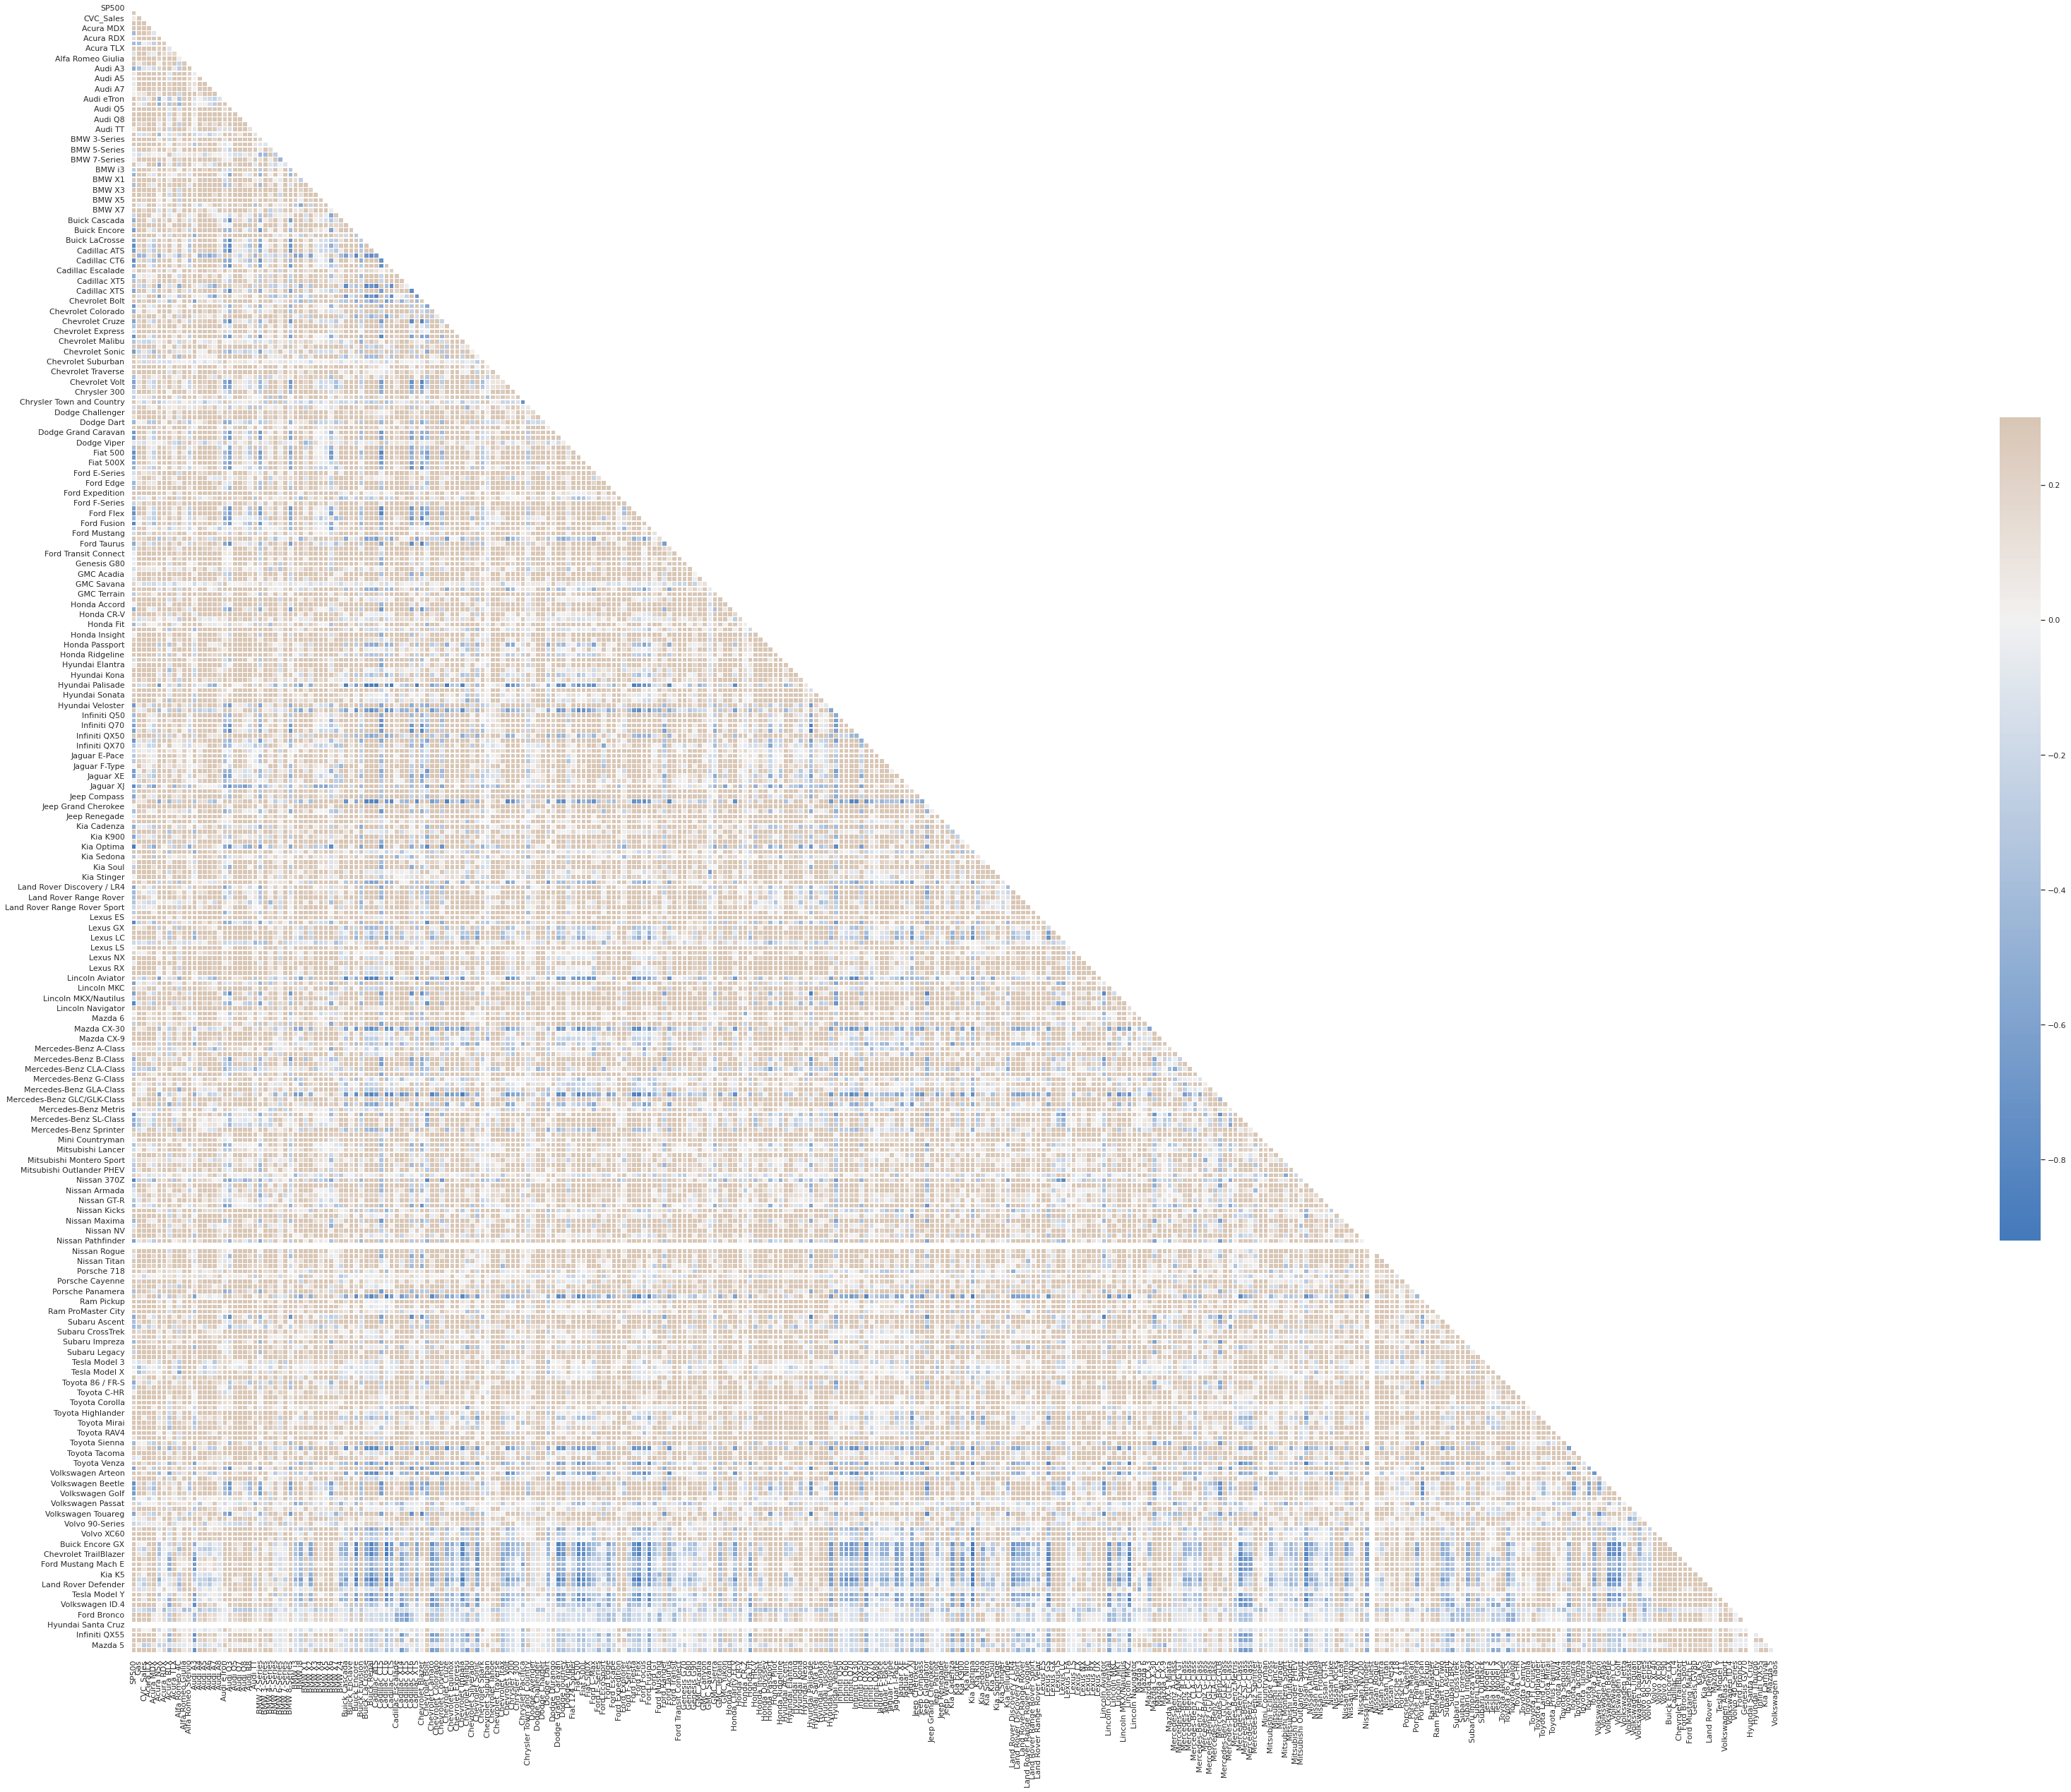

In [84]:
# Correlation map for all columns
from string import ascii_letters

sns.set_theme(style="white")

# Generate a large random dataset
cor_data = df_1 
d = cor_data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 40, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# XGBoost with slinding window method

>expected=23260.0, predicted=24790.6
>expected=25188.0, predicted=23276.2
>expected=25524.0, predicted=26390.3
>expected=22371.0, predicted=24635.4
>expected=21865.0, predicted=23708.0
>expected=17372.0, predicted=18585.7
>expected=21047.0, predicted=24640.6
>expected=15475.0, predicted=20083.3
>expected=15906.0, predicted=17170.2
>expected=24522.0, predicted=21062.0
>expected=28414.0, predicted=22232.0
>expected=35962.0, predicted=27515.6
>expected=32677.0, predicted=29737.2
MAE: 3086.470 RMSE: 3748.510


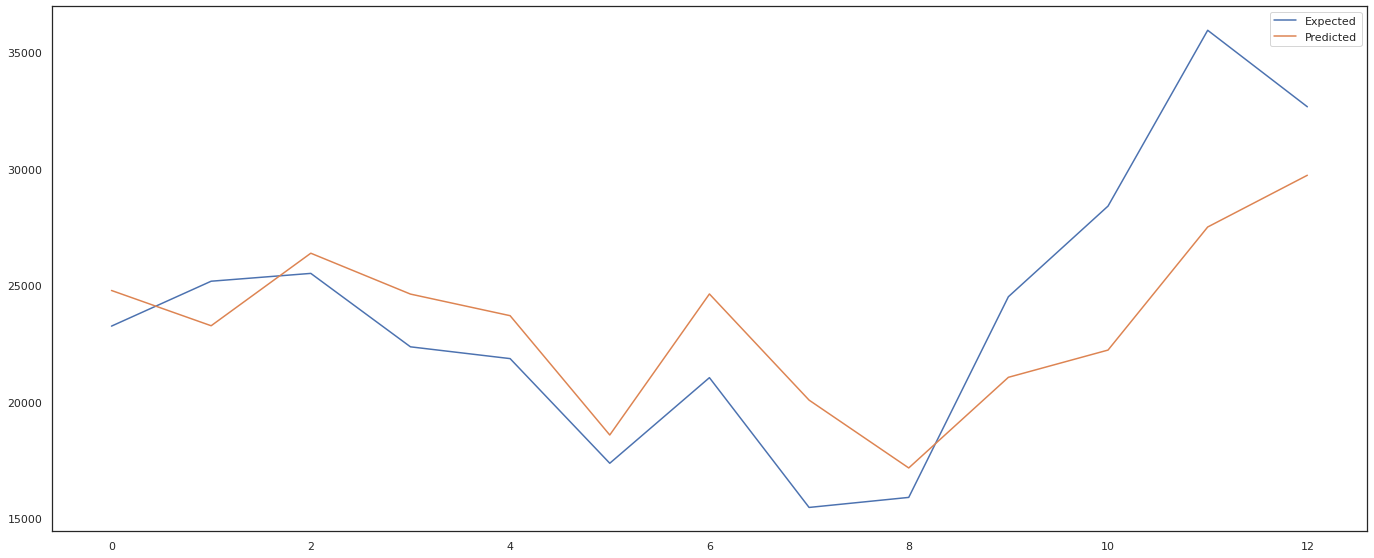

In [85]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model, spent hours to adjust the parameter
	model = XGBRegressor(n_estimators=400, objective="reg:squarederror", eta="0.3",
                      max_depth="6",subsample="0.9",colsample_bytree="0.5",reg_lambda="7.5",
                      min_child_weight="5")
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	error2 = mean_squared_error(test[:, -1], predictions, squared=False)
	return error, error2, test[:, -1], predictions

# load the dataset
series = df
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=4)
# evaluate
mae, RMSE, y, yhat = walk_forward_validation(data,13)
print('MAE: %.3f' % mae, 'RMSE: %.3f' % RMSE)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

## The best model: on average if 25 units will be sold per month/per dealer, the prediction will be 25 +/- 3 units/month, the model is acceptable for me.